In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

In [22]:
nstars = 53
nparams = nstars*11+(3*3)+1
nparams_nt = 50*10+(3*3)+1
print(nparams)

#df = pd.read_csv('../data/stanfits/tau_models_200.csv', names=['kic', 'dnu',
#                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df = pd.read_csv('../data/stanfits/ngc6791_tau.csv', names=['kic', 'dnu',
                    'numax', 'epsilon', 'alpha', 'A', 'G', 'phi', 'tau'])
df['kic'] = df['kic'].astype(int)
#display(df.describe())

hier = pd.read_csv('../data/stanfits/ngc6791_summ_tau.txt', skiprows=4, nrows=nparams, delim_whitespace=True)
hier_nt = pd.read_csv('../data/stanfits/ngc6791_summ_notau.txt', skiprows=4, nrows=nparams_nt, delim_whitespace=True)
#display(hier.iloc[251])
epsA = hier.loc['epsA']['mean']#:'sd']
epsB = hier.loc['epsB']['mean']
alA = hier.loc['alA']['mean']
alB = hier.loc['alB']['mean']
AA = hier.loc['AA']['mean']
AB = hier.loc['AB']['mean']
print(epsA, epsB)
print(alA, alB)
print(AA, AB)


df_rgb = pickle.load(open('df_rgb.pkl', 'rb'))
df_rcl = pickle.load(open('df_rc.pkl', 'rb'))

593
0.061 0.086
0.034 0.35
0.21600000000000003 0.862


In [23]:
dnus = np.linspace(df_rgb['dnu'].min(), df_rgb['dnu'].max(), 50)
dnus2 = np.linspace(0.1, df['dnu'].max(), 20)
As = AA * dnus**(-AB)
alphas = alA * dnus**(-alB)
epsilons = epsA + epsB*np.log(dnus)
depsilons = epsA + epsB*np.log(df['dnu'])
#df['eps_resi'] = df['epsilon'] - depsilons
#phis = -3.75 + 2.75*np.log(dnus)
phis = -1.9 + 1.5*np.log(dnus)
#plt.scatter(np.log(df['dnu'].loc[(df['phi'] > 0)]), np.log(df['phi'].loc[(df['phi'] > 0)]))
#plt.scatter((df['dnu']), (df['phi']))
#plt.plot(np.log(dnus), -dnus**2, color='r')
#0.601 + 0.632 logΔν
#plt.plot(dnus, phis, color='r')
#plt.xlim(0,10)
#df.loc[df.epsilon > 0.45, 'epsilon'] = df['epsilon'] - 1

#display(df)

In [24]:
apokasc = pd.read_csv('../data/APOKASCfull.csv', usecols=['KIC', 'Teff2', '[M/H]2', 'M2', 'R2'])
apokasc = pd.read_csv('../data/apokasc2.csv', delim_whitespace=True,
                      usecols=['KIC', 'Teff', 'FeH', 'M(cor)', 'ES'])
apokasc = apokasc.replace('        ', np.nan)
apokasc = apokasc.replace('...', np.nan)
#display(apokasc)
metals = []
temps = []
evols = []
for i in df['kic']:
    if any(apokasc['KIC'] == i):
        z = apokasc.loc[(apokasc.KIC == i)]['FeH'].values
        T = apokasc.loc[(apokasc.KIC == i)]['Teff'].values
        evol = apokasc.loc[(apokasc.KIC == i)]['ES'].values
        metals.append(float(z[0]))
        temps.append(float(T[0]))
        evols.append(evol[0])
    else:
        metals.append(np.nan)
        temps.append(np.nan)
        evols.append(np.nan)

df['FeH'] = metals
df['Teff'] = temps
df['ES'] = evols
#df = df.dropna(subset=['tau'])
#display(df)
ts = df.dropna(subset=['tau']).reset_index(drop=True)
tsa = np.asarray(ts.index) + 1
nts = np.arange(max(tsa)+1, 53, 1) + 1
#nts = np.where(df['tau'].isna())[0] + 1
display(ts)
err_eps = np.zeros([53])
err_alpha = np.zeros([53])
err_A = np.zeros([53])
err_G = np.zeros([53])
err_phi = np.zeros([53])
err_tau = np.zeros([53])

#print(hier.loc['epsilon[148]']['sd'])
#print(ts, nts)
for i in tsa:
    err_eps[i-1] = (hier.loc['epsilon['+str(i)+']']['sd'])
    err_alpha[i-1] = (hier.loc['alpha['+str(i)+']']['sd'])
    err_A[i-1] = (hier.loc['A['+str(i)+']']['sd'])
    err_G[i-1] = (hier.loc['G['+str(i)+']']['sd'])
    err_phi[i-1] = (hier.loc['phi['+str(i)+']']['sd'])
    err_tau[i-1] = (hier.loc['tau['+str(i)+']']['sd'])
#print(hier_nt.loc['alpha[36]']['sd'])
for i in nts:
    err_eps[i-1] = (hier_nt.loc['epsilon['+str(i)+']']['sd'])
    err_alpha[i-1] = (hier_nt.loc['alpha['+str(i)+']']['sd'])
    err_A[i-1] = (hier_nt.loc['A['+str(i)+']']['sd'])
    err_G[i-1] = (hier_nt.loc['G['+str(i)+']']['sd'])
    err_phi[i-1] = (hier_nt.loc['phi['+str(i)+']']['sd'])
    err_tau[i-1] = 0

#print(len(df))
    
#print(np.shape(err_eps))

df['e_eps'] = err_eps
df['e_al'] = err_alpha
df['e_A'] = err_A
df['e_G'] = err_G
df['e_phi'] = err_phi
df['e_tau'] = err_tau
df = df.drop([32])

#df = df[df.ES != 'REJECT']
#df = df.dropna(subset=['FeH', 'Teff', 'ES'])

phirange = []
for i in df['phi']:
    if i < -np.pi:
        nphi = i + 2*np.pi
        phirange.append(nphi)
    elif i > np.pi:
        nphi = i - 2*np.pi
        phirange.append(nphi)
    else: phirange.append(i)
df['phi'] = phirange


#df
#print(phirange)

,kic,dnu,numax,epsilon,alpha,A,G,phi,tau,FeH,Teff,ES
0,2297384,3.984511,31.541321,0.379256,0.021602,0.056076,8.361569,-2.767104,4.889015,0.484,4521.6,RC
1,2297825,4.001487,36.540933,0.412435,0.031034,0.055523,3.519905,-2.256312,12.951862,0.431,4550.1,RC
2,2435987,4.112772,33.950550,0.175712,0.020134,0.057474,2.122950,-1.783166,10.405972,0.383,4434.2,RGB
3,2436097,5.668183,53.817894,0.176082,0.015737,0.041791,2.596984,0.404897,8.963576,NaN,NaN,NaN
4,2436209,3.301371,26.190275,0.143604,0.020853,0.067627,2.356923,-0.794563,10.424708,0.428,4498.4,RGB
5,2436332,3.574450,31.858758,0.457034,0.028849,0.062070,2.528709,-2.681829,11.649899,NaN,NaN,NaN
6,2436417,4.078491,35.847467,0.133506,0.022140,0.069168,2.765952,0.166497,9.286896,0.418,4487.5,RC
7,2436458,5.742291,56.342135,0.170547,0.014993,0.042848,2.626315,1.206186,5.678186,NaN,NaN,NaN
8,2436540,9.622741,109.315355,0.247767,0.016484,0.028918,3.223081,1.275793,12.942171,0.409,4492.1,RGB
9,2436593,11.337245,141.995781,0.215048,0.016511,0.028250,2.760661,1.829400,9.634357,NaN,NaN,NaN


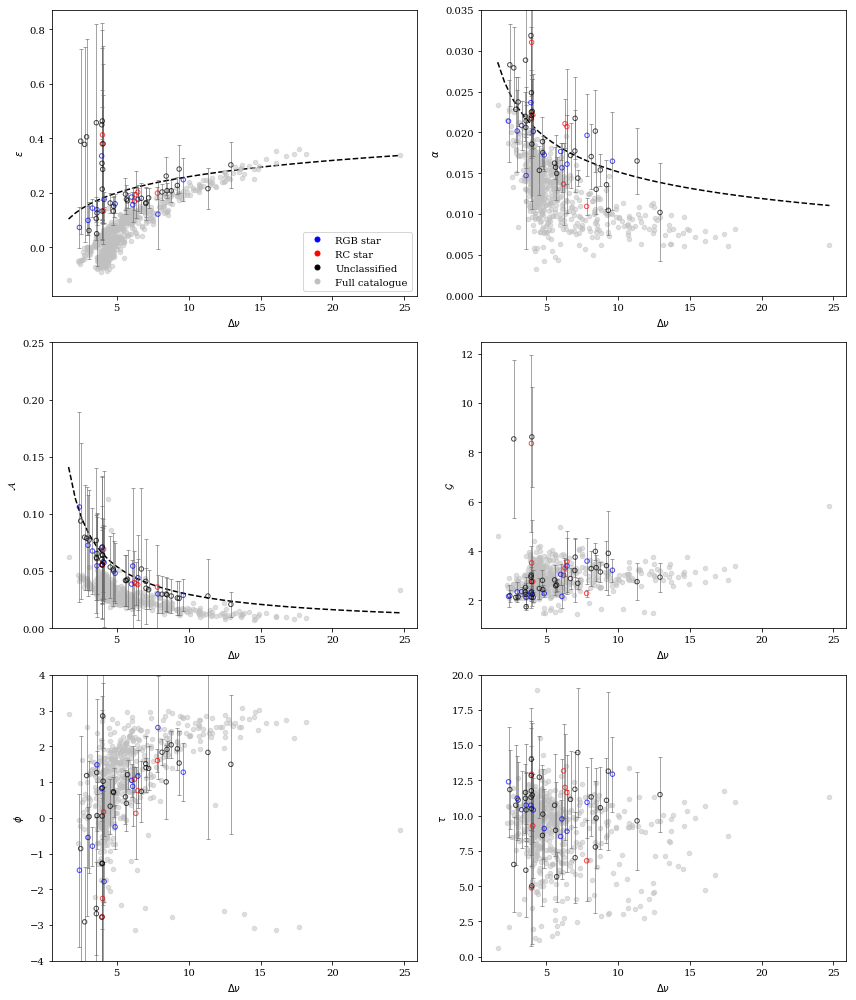

In [29]:
colours=['red' if i=='RC' else 'orange' if i=='RC(S)' else
        'blue' if i=='RGB' else 'blue' if i=='RGB(S)' else
         'k' for i in df['ES']]

kwargs = dict(s=20, facecolors='none', zorder=1, edgecolors=colours, alpha=0.7, label='')
apokwg = dict(s=20, color='silver', zorder=-1, alpha=0.5, label='')
errkwg = dict(fmt="none", c='dimgrey', capsize=2, alpha=0.6,
              markersize=4, elinewidth=1, zorder=0, label='')

f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(12,14))

ax3.scatter(df_rgb['dnu'], df_rgb['A'], **apokwg)
ax3.scatter(df_rcl['dnu'], df_rcl['A'], **apokwg)
ax3.scatter(df['dnu'], df['A'], **kwargs)
ax3.errorbar(df['dnu'], df['A'], yerr=df['e_A'], **errkwg)
ax3.plot(dnus, As, '--', c='k', zorder=-2)
ax3.set_ylim([0,0.25])
ax3.set_xlabel(r'$\Delta\nu$')
ax3.set_ylabel('$\mathcal{A}$')

ax4.scatter(df_rgb['dnu'], df_rgb['G'], **apokwg)
ax4.scatter(df_rcl['dnu'], df_rcl['G'], **apokwg)
ax4.scatter(df['dnu'], df['G'], **kwargs)
ax4.errorbar(df['dnu'], df['G'], yerr=df['e_G'], **errkwg)
ax4.set_xlabel(r'$\Delta\nu$')
ax4.set_ylabel('$\mathcal{G}$')

ax5.scatter(df_rgb['dnu'], df_rgb['phi'], **apokwg)
ax5.scatter(df_rcl['dnu'], df_rcl['phi'], **apokwg)
ax5.scatter(df['dnu'], df['phi'], **kwargs)
ax5.errorbar(df['dnu'], df['phi'], yerr=df['e_phi'], **errkwg)
#ax5.plot(dnus, phis, '--', c='k')
ax5.set_ylim([-4,4])
ax5.set_xlabel(r'$\Delta\nu$')
ax5.set_ylabel(r'$\phi$')

ax6.scatter(df_rgb['dnu'], df_rgb['tau'], **apokwg)
ax6.scatter(df_rcl['dnu'], df_rcl['tau'], **apokwg)
ax6.scatter(df['dnu'], df['tau'], **kwargs)
ax6.errorbar(df['dnu'], df['tau'], yerr=df['e_tau'], **errkwg)
ax6.set_xlabel(r'$\Delta\nu$')
ax6.set_ylabel(r'$\tau$')

ax1.scatter(df_rgb['dnu'], df_rgb['epsilon'], **apokwg)
ax1.scatter(df_rcl['dnu'], df_rcl['epsilon'], **apokwg)
ax1.scatter(df['dnu'], df['epsilon'], **kwargs)
ax1.errorbar(df['dnu'], df['epsilon'], yerr=df['e_eps'], **errkwg)
ax1.plot(dnus, epsilons, '--', c='k', zorder=-2)
ax1.set_xlabel(r'$\Delta\nu$')
ax1.set_ylabel(r'$\epsilon$')

ax2.scatter(df_rgb['dnu'], df_rgb['alpha'], **apokwg)
ax2.scatter(df_rcl['dnu'], df_rcl['alpha'], **apokwg)
ax2.scatter(df['dnu'], df['alpha'], **kwargs)
ax2.errorbar(df['dnu'], df['alpha'], yerr=df['e_al'], **errkwg)
ax2.plot(dnus, alphas, '--', c='k', zorder=-2)
ax2.set_ylim([0,0.035])
ax2.set_xlabel(r'$\Delta\nu$')
ax2.set_ylabel(r'$\alpha$')

bluedot = plt.Line2D([], [], color='blue', marker='o', linestyle='',
                          markersize=5, label='RGB star')
reddot = plt.Line2D([], [], color='red', marker='o', linestyle='',
                          markersize=5, label='RC star')
greydot = plt.Line2D([], [], color='k', marker='o', linestyle='',
                          markersize=5, label='Unclassified')
back = plt.Line2D([], [], color='silver', marker='o', linestyle='',
                          markersize=5, label='Full catalogue')
ax1.legend(handles=[bluedot, reddot, greydot, back], loc=4)

plt.tight_layout()
plt.savefig('plots/ngc6791parameters.pdf')
plt.show()

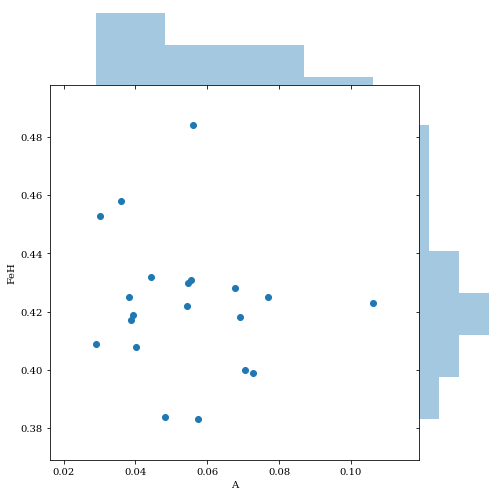

In [26]:
#f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,8))
ax1 = sns.jointplot(df['A'], df['FeH'], height=7, space=0)

ValueError: c of shape (52,) not acceptable as a color sequence for x with size 53, y with size 53

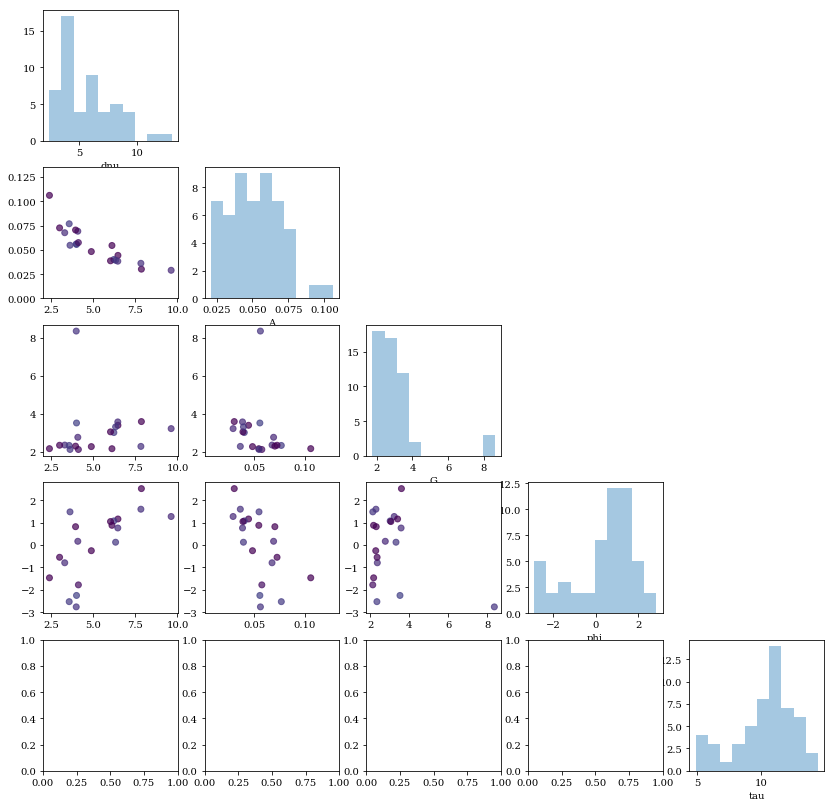

In [27]:
plt.figure(figsize=(14,14))
gs = GridSpec(5, 5)
diag0 = plt.subplot(gs[0, 0:1])
diag1 = plt.subplot(gs[1, 1:2])
diag2 = plt.subplot(gs[2, 2:3])
diag3 = plt.subplot(gs[3, 3:4])
diag4 = plt.subplot(gs[4, 4:5])
ax1a = plt.subplot(gs[1, 0:1])
ax2a = plt.subplot(gs[2, 0:1])
ax2b = plt.subplot(gs[2, 1:2])
ax3a = plt.subplot(gs[3, 0:1])
ax3b = plt.subplot(gs[3, 1:2])
ax3c = plt.subplot(gs[3, 2:3])
ax4a = plt.subplot(gs[4, 0:1])
ax4b = plt.subplot(gs[4, 1:2])
ax4c = plt.subplot(gs[4, 2:3])
ax4d = plt.subplot(gs[4, 3:4])

colours = dict(c=df['Teff'], cmap='viridis', vmin=4400, vmax=5200)
dist_kwargs = dict(kde=False, bins=10)
scat_kwargs = dict(marker='o', alpha=0.7, **colours)

sns.distplot(df['dnu'], ax=diag0, **dist_kwargs)
sns.distplot(df['A'], ax=diag1, **dist_kwargs)
sns.distplot(df['G'], ax=diag2, **dist_kwargs)
sns.distplot(df['phi'], ax=diag3, **dist_kwargs)
sns.distplot(ts['tau'], ax=diag4, **dist_kwargs)

a = ax1a.scatter(df['dnu'], df['A'], **scat_kwargs)
ax2a.scatter(df['dnu'], df['G'], **scat_kwargs)
ax2b.scatter(df['A'], df['G'], **scat_kwargs)
ax3a.scatter(df['dnu'], df['phi'], **scat_kwargs)
ax3b.scatter(df['A'], df['phi'], **scat_kwargs)
ax3c.scatter(df['G'], df['phi'], **scat_kwargs)
ax4a.scatter(ts['dnu'], ts['tau'], **scat_kwargs)
ax4b.scatter(df['A'], df['tau'], **scat_kwargs)
ax4c.scatter(df['G'], df['tau'], **scat_kwargs)
ax4d.scatter(ts['phi'], ts['tau'], **scat_kwargs)

diags = [diag0, diag1, diag2, diag3]
inner = [ax2b, ax3b, ax3c]
side = [ax1a, ax2a, ax3a]
bottom = [ax4b, ax4c, ax4d, diag4]
ax4a.spines['right'].set_visible(False)
ax4a.spines['top'].set_visible(False)

for i in diags:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False, left=False)
    i.set(xlabel='')
for i in inner:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False, labelleft=False)
for i in side:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelbottom=False)
for i in bottom:
    i.spines['right'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.tick_params(labelleft=False)

diag0.set_ylabel(r'$\Delta\nu$')
ax1a.set_ylabel(r'$\mathcal{A}$')
ax2a.set_ylabel(r'$\mathcal{G}$')
ax3a.set_ylabel(r'$\phi$')
ax4a.set_ylabel(r'$\tau$')
#ax2b.set_xlim([0.015, 0.035])

ax4a.set_xlabel(r'$\Delta\nu$')
ax4b.set_xlabel(r'$\mathcal{A}$')
ax4c.set_xlabel(r'$\mathcal{G}$')
ax4d.set_xlabel(r'$\phi$')
diag4.set_xlabel(r'$\tau$')

cax = plt.axes([0.8, 0.3, 0.025, 0.2])
cbar = plt.colorbar(a, cax=cax, use_gridspec=True)
cbar.set_label('Surface Temperature (K)')
#plt.tight_layout()
plt.savefig('plots/ngc6791correlations.pdf')
plt.show()

In [70]:
h_rgb = pd.read_csv('../data/stanfits/rgb_tau_hiers.csv', index_col='Unnamed: 0')
h_rcl = pd.read_csv('../data/stanfits/rc_tau_hiers.csv', index_col='Unnamed: 0')
h_6791 = pd.read_csv('../data/stanfits/ngc6791_tau_hiers.csv')
h_6791 = pd.read_csv('../data/stanfits/ngc6791_tau_hiers.csv')
dists = [h_rgb, h_rcl, h_6791, h_6791]
#h_rgb

[0.003819375475147487, 0.00638781749634545, 0.01231764013987577, 0.00010172988175755418]
[0.00038610248809221924, 0.0005932507713499497, 0.005289577161323295, 3.585466623025765e-06]


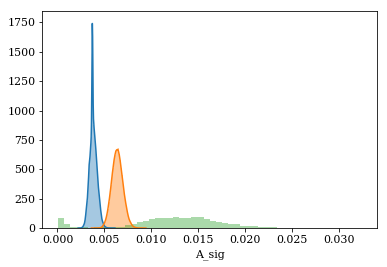

In [75]:
sns.distplot(h_rgb['A_sig'])
sns.distplot(h_rcl['A_sig'])
sns.distplot(h_6791['A_sig'], kde=False, norm_hist=True)
#sns.distplot(h_6791['A_sig'], kde=False, norm_hist=True)
#from scipy import stats
#print(stats.mode(h_6791['A_sig']))
print([np.mean(i['A_sig']) for i in dists])
print([np.std(i['A_sig']) for i in dists])

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(4,8))

sns.distplot(h_rgb['Teff'], ax=ax1)
sns.distplot(df['Teff'], ax=ax1)